<center><h2><u> ICC Men's T20 World Cup 2024 Analysis </u></h2></center>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('WC24.xlsx')

In [3]:
df.head()

,Stadium,City,Team1,Team2,Stage,Toss Winner,Toss Decision,First Innings Score,First Innings Wickets,Second Innings Score,Second Innings Wickets,Winner,WonBy,POM,Top Scorer,Highest Score,Best Bowler,Best Bowling Figure
0,Grand Prairie Stadium,Dallas,Canada,USA,Group Stage,USA,Bowl,194.0,5.0,197.0,3.0,USA,Wickets,Aaron Jones,Aaron Jones,94.0,Dillon Heyliger,1-19
1,Providence Stadium,Guyana,Papua New Guinea,West Indies,Group Stage,West Indies,Bowl,136.0,8.0,137.0,5.0,WI,Wickets,Roston Chase,Sese Bau,50.0,Akeal Hosein,1-9
2,Kensington Oval,Barbados,Oman,Namibia,Group Stage,Namibia,Bowl,109.0,10.0,109.0,6.0,Namibia,Super Over,David Wiese,Jan Frylinck,45.0,Ruben Trumpelmann,4-21
3,Nassau County Stadium,New York,Sri Lanka,South Africa,Group Stage,Sri Lanka,Bat,77.0,10.0,80.0,4.0,South Africa,Wickets,Anrich Nortje,Quinton De Kock,20.0,Anrich Nortje,4-7
4,Providence Stadium,Guyana,Afghanistan,Uganda,Group Stage,Uganda,Bowl,183.0,5.0,58.0,10.0,Afghanistan,Runs,Fazalhaq Farooqi,Rahmanullah Gurbaz,76.0,Fazalhaq Farooqi,5-9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Stadium                 55 non-null     object 
 1   City                    55 non-null     object 
 2   Team1                   55 non-null     object 
 3   Team2                   55 non-null     object 
 4   Stage                   55 non-null     object 
 5   Toss Winner             52 non-null     object 
 6   Toss Decision           52 non-null     object 
 7   First Innings Score     52 non-null     float64
 8   First Innings Wickets   51 non-null     float64
 9   Second Innings Score    51 non-null     float64
 10  Second Innings Wickets  51 non-null     float64
 11  Winner                  55 non-null     object 
 12  WonBy                   51 non-null     object 
 13  POM                     51 non-null     object 
 14  Top Scorer              51 non-null     obje

In [5]:
df.columns

Index(['Stadium', 'City', 'Team1', 'Team2', 'Stage', 'Toss Winner',
       'Toss Decision', 'First Innings Score', 'First Innings Wickets',
       'Second Innings Score', 'Second Innings Wickets', 'Winner', 'WonBy',
       'POM', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowling Figure'],
      dtype='object')

In [6]:
df.shape

(55, 18)

In [65]:
df['Team2'] = df['Team2'].replace(' Netherland', 'Netherlands')

In [66]:
Team1 = df['Team1'].unique().tolist()
Team2 = df['Team2'].unique().tolist()

Teams = set(Team1 + Team2)
Teams = [team.strip() for team in Teams] 
Teams = list(set(Teams)) 

print(Teams)

['West Indies', 'India', 'Uganda', 'Afghanistan', 'England', 'Netherlands', 'Scotland', 'Canada', 'Oman', 'Papua New Guinea', 'Sri Lanka', 'South Africa', 'Pakistan', 'USA', 'Australia', 'Nepal', 'New Zealand', 'Namibia', 'Bangladesh', 'Ireland']


In [67]:
len(Teams)

20

There are 20 teams participating in Men's T20 World Cup 2024.

In [7]:
sns.set(style='whitegrid')

##### Number of matches won by each team

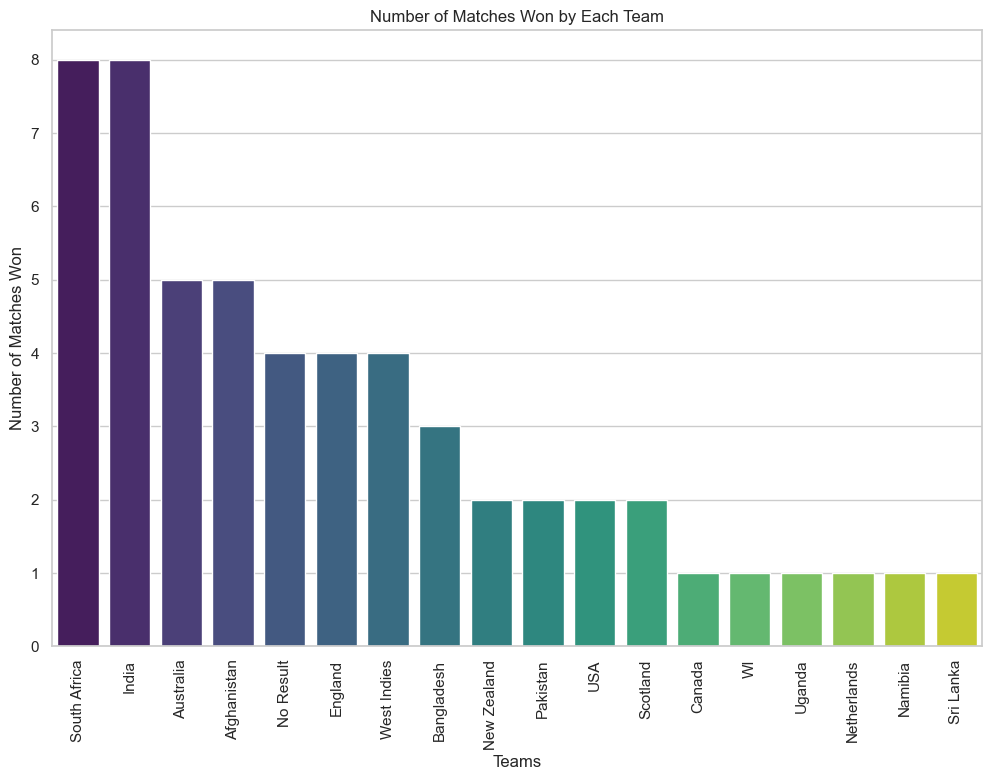

In [9]:
matches_won = df['Winner'].value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=matches_won.index, y=matches_won.values, palette='viridis')
plt.title('Number of Matches Won by Each Team')
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=90)
plt.show()

India and South Africa have won more matches compared to other teams.

##### Number of matches won by batting first or bowling first

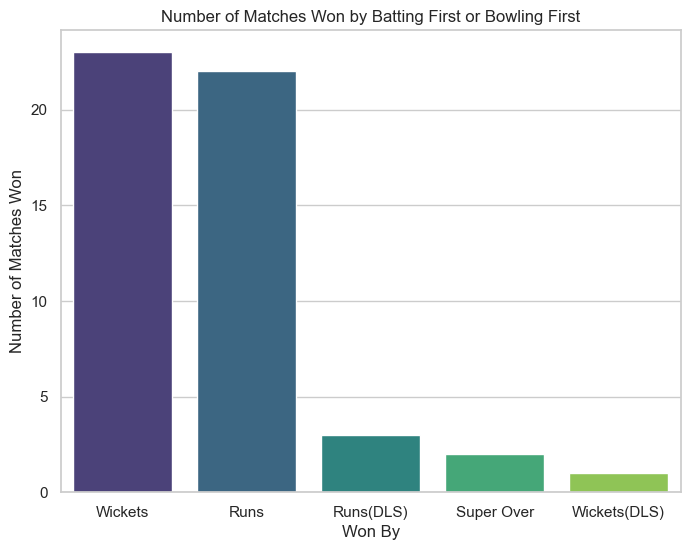

In [12]:
WonBy = df['WonBy'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=WonBy.index, y=WonBy.values, palette='viridis')
plt.title('Number of Matches Won by Batting First or Bowling First')
plt.xlabel('Won By')
plt.ylabel('Number of Matches Won')
plt.show()

Majority of the matches are typically won by teams that bowl first.

##### Toss Decisions By Teams

<Figure size 1200x800 with 0 Axes>

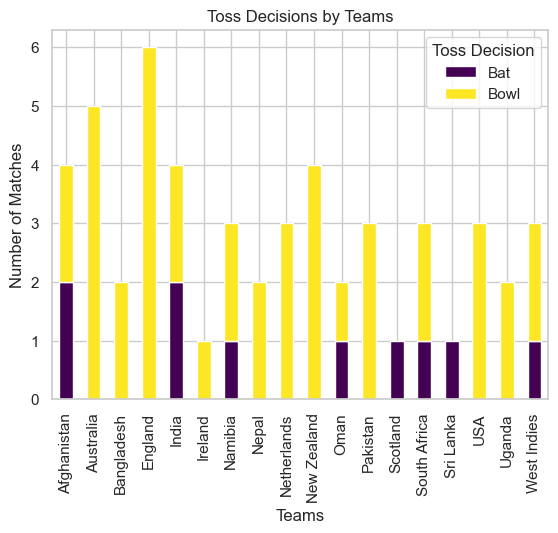

In [13]:
toss_decisions = df.groupby(['Toss Winner', 'Toss Decision']).size().unstack()
plt.figure(figsize=(12, 8))
toss_decisions.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Toss Decisions by Teams')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.show()

Most teams that win the toss opt to bowl first.

##### Top Scorers

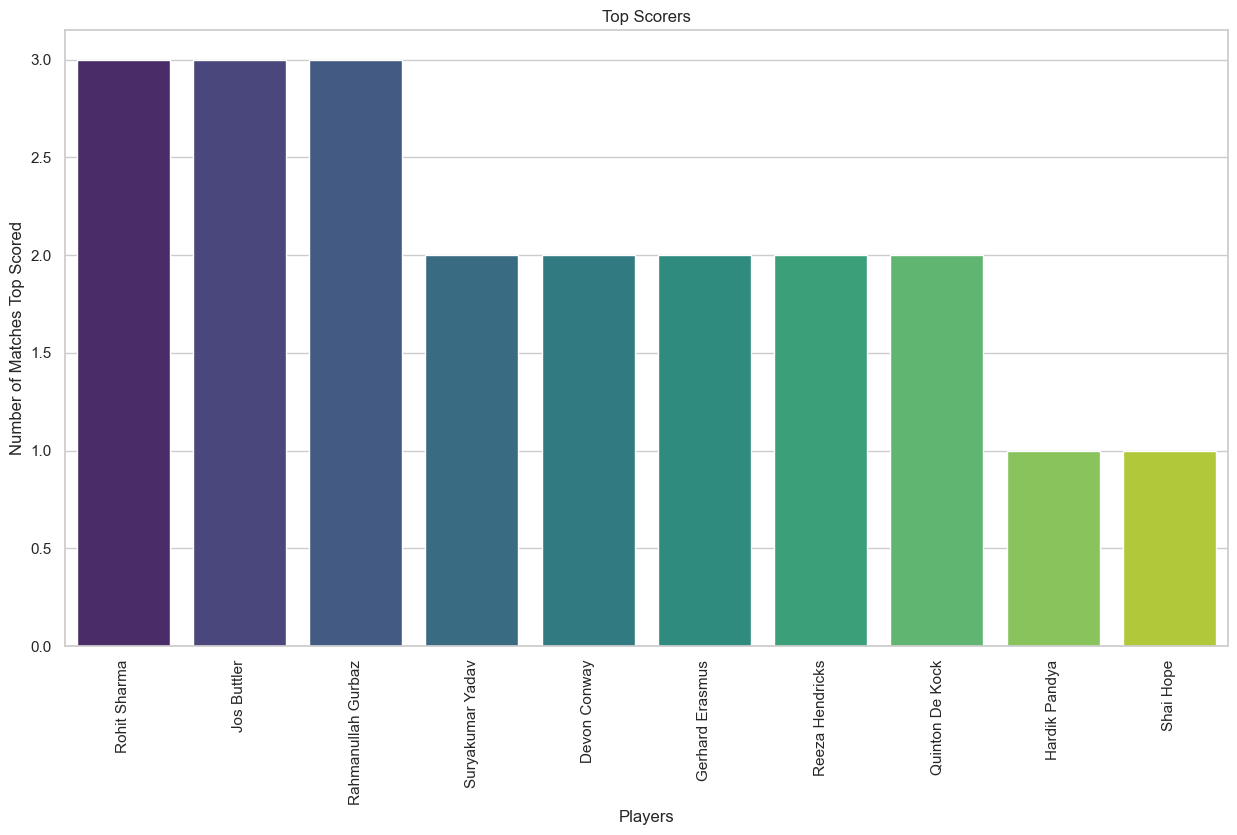

In [73]:
top_scorers = df['Top Scorer'].value_counts().nlargest(10)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='viridis')
plt.title('Top Scorers')
plt.xlabel('Players')
plt.ylabel('Number of Matches Top Scored')
plt.xticks(rotation=90)
plt.show()

Rohit Sharma, Jos Buttler, and Rahmanullah Gurbaz scored highest runs in 3 matches.

##### Number of Player of the Match Awards

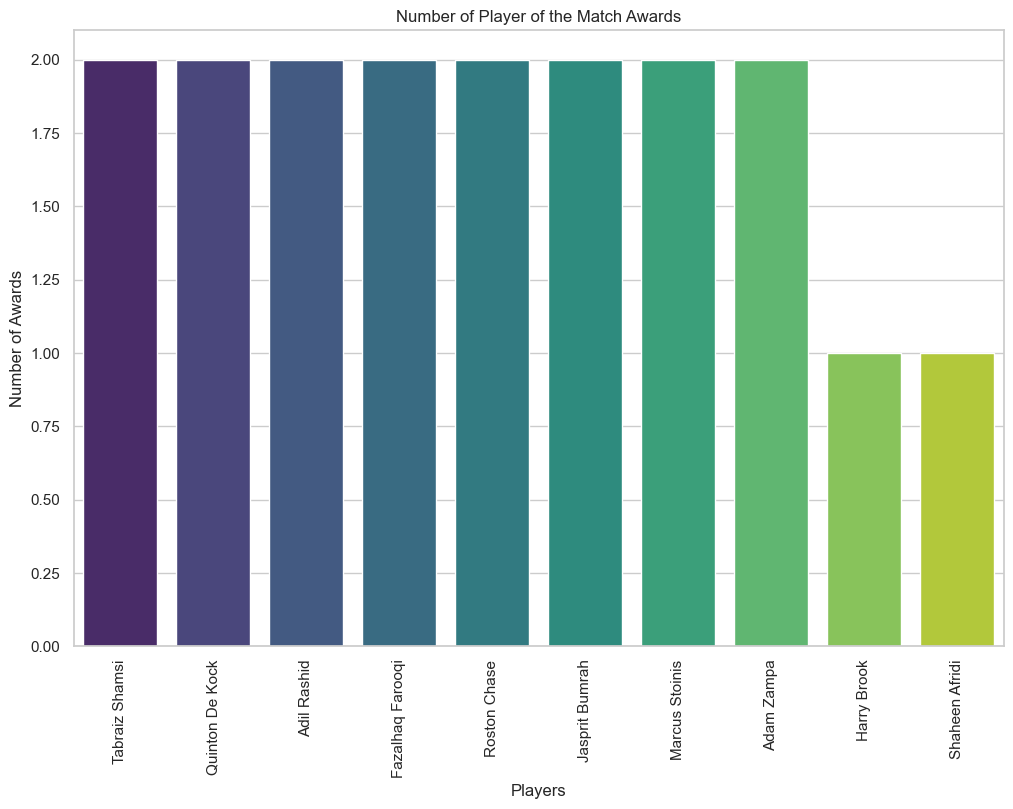

In [15]:
player_of_match = df['POM'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=player_of_match.index, y=player_of_match.values, palette='viridis')
plt.title('Number of Player of the Match Awards')
plt.xlabel('Players')
plt.ylabel('Number of Awards')
plt.xticks(rotation=90)
plt.show()

Tabraiz Shamsi, Quinton De Kock, Adil Rashid, Fazalhaq Farooqi, Roston Chase, Jasprit Bumrah, Marcus Stoinis, and Adam Zampa 
won player of the match awards twice.

##### Bowlers with Best Bowling Figures at the End of the Match

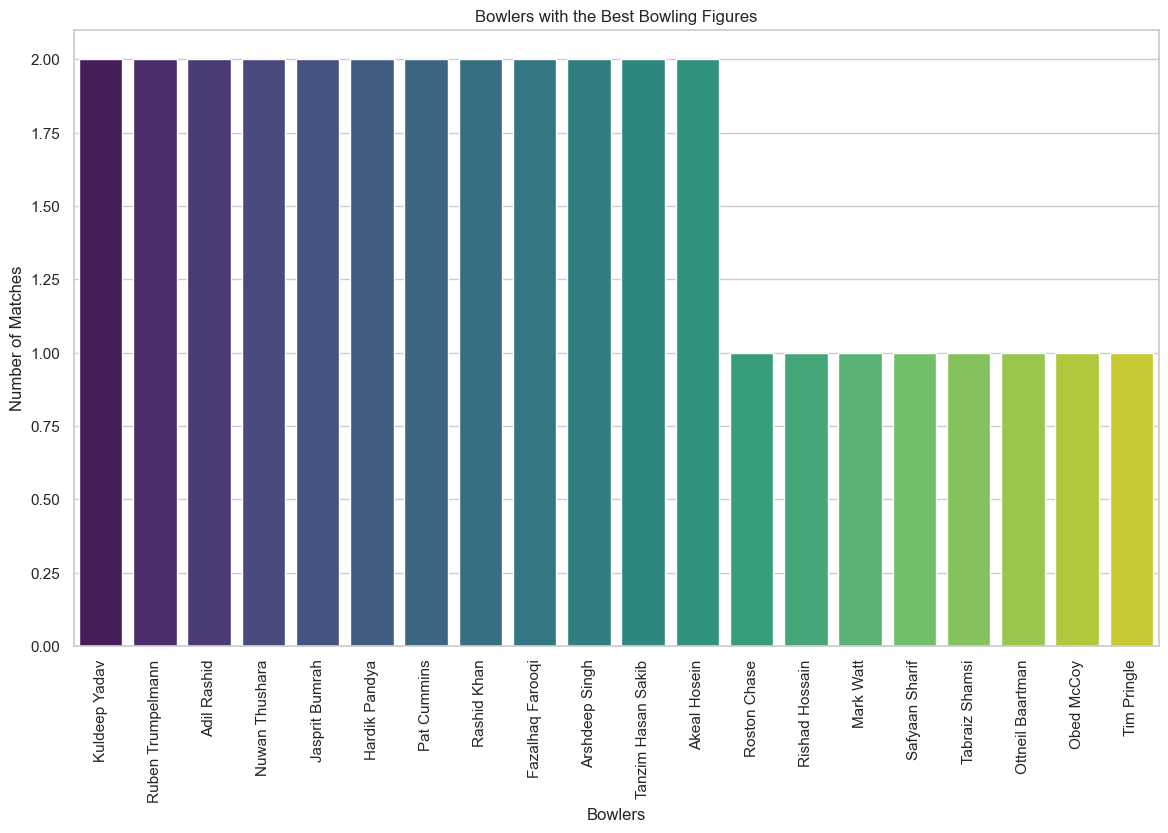

In [75]:
best_bowlers = df.groupby(['Best Bowler']).size().reset_index(name='counts')
best_bowlers = best_bowlers.sort_values(by='counts', ascending=False).head(20)
plt.figure(figsize=(14, 8))
sns.barplot(x=best_bowlers['Best Bowler'], y=best_bowlers['counts'], palette='viridis')
plt.title('Bowlers with the Best Bowling Figures')
plt.xlabel('Bowlers')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

##### Stadiums in which wins occurred by bowling first or batting first

<Figure size 1400x800 with 0 Axes>

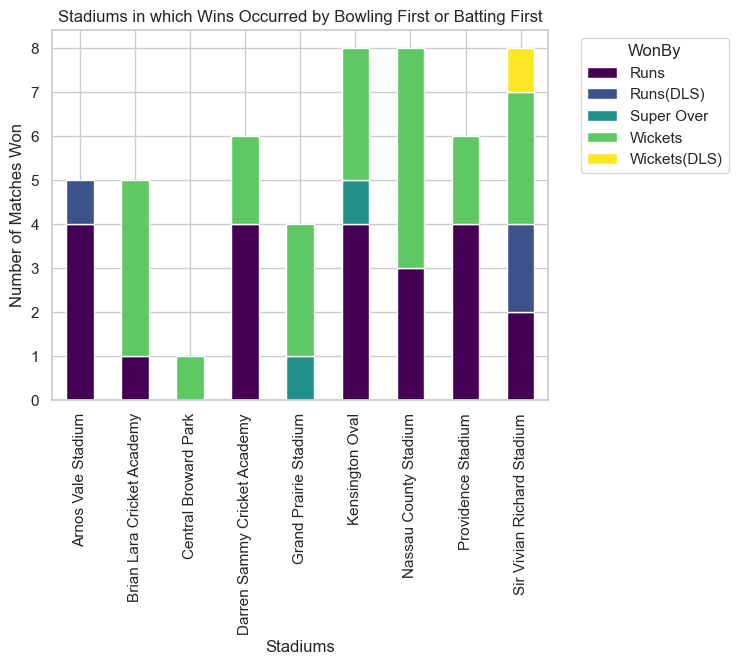

In [76]:
stadium_wins = df.groupby(['Stadium', 'WonBy']).size().unstack()
plt.figure(figsize=(14, 8))
stadium_wins.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Stadiums in which Wins Occurred by Bowling First or Batting First')
plt.xlabel('Stadiums')
plt.ylabel('Number of Matches Won')
plt.xticks(rotation=90)
plt.legend(title='WonBy', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Performance Comparision Between Teams

##### Average Scores by Each Team

<Figure size 1200x800 with 0 Axes>

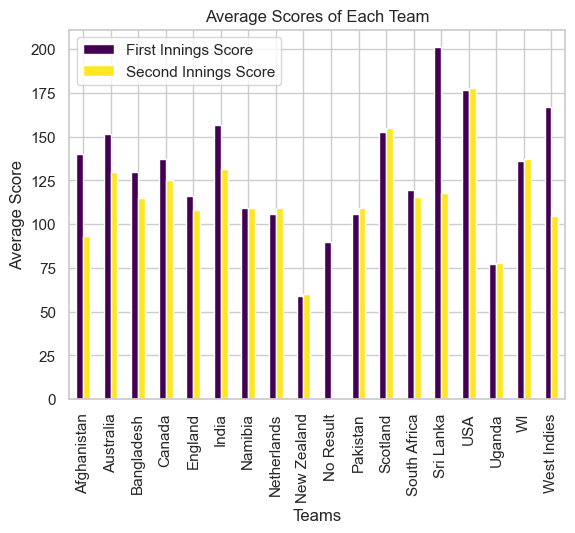

In [19]:
average_scores = df.groupby('Winner').agg({'First Innings Score': 'mean', 'Second Innings Score': 'mean'}).fillna(0)
plt.figure(figsize=(12, 8))
average_scores.plot(kind='bar', colormap='viridis')
plt.title('Average Scores of Each Team')
plt.xlabel('Teams')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

##### Win Percentage of Each Team

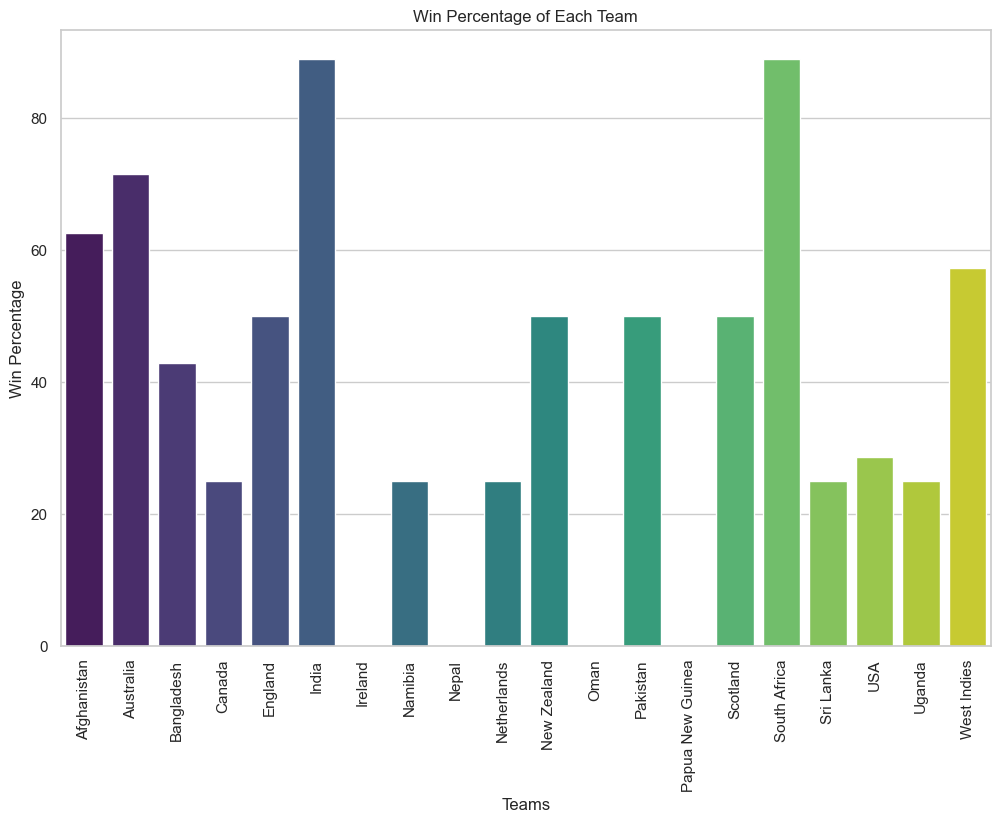

In [77]:
df['Team1'] = df['Team1'].str.strip()
df['Team2'] = df['Team2'].str.strip()
df['Winner'] = df['Winner'].str.strip()

# Calculate total matches played by each team
total_matches_team1 = df['Team1'].value_counts()
total_matches_team2 = df['Team2'].value_counts()
total_matches = total_matches_team1.add(total_matches_team2, fill_value=0)

# Calculate matches won by each team
matches_won = df['Winner'].value_counts()

# Calculate win percentage
win_percentage = (matches_won / total_matches) * 100

# Ensure both Series have the same index for plotting
win_percentage = win_percentage.reindex(total_matches.index, fill_value=0)

# Plot the win percentage
plt.figure(figsize=(12, 8))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette='viridis')
plt.title('Win Percentage of Each Team')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.show()

India and South Africa have the highest winning percentage.

#### Player Performance Analysis

##### Top Run Scorers Overall Based on Highest Score in the particular match

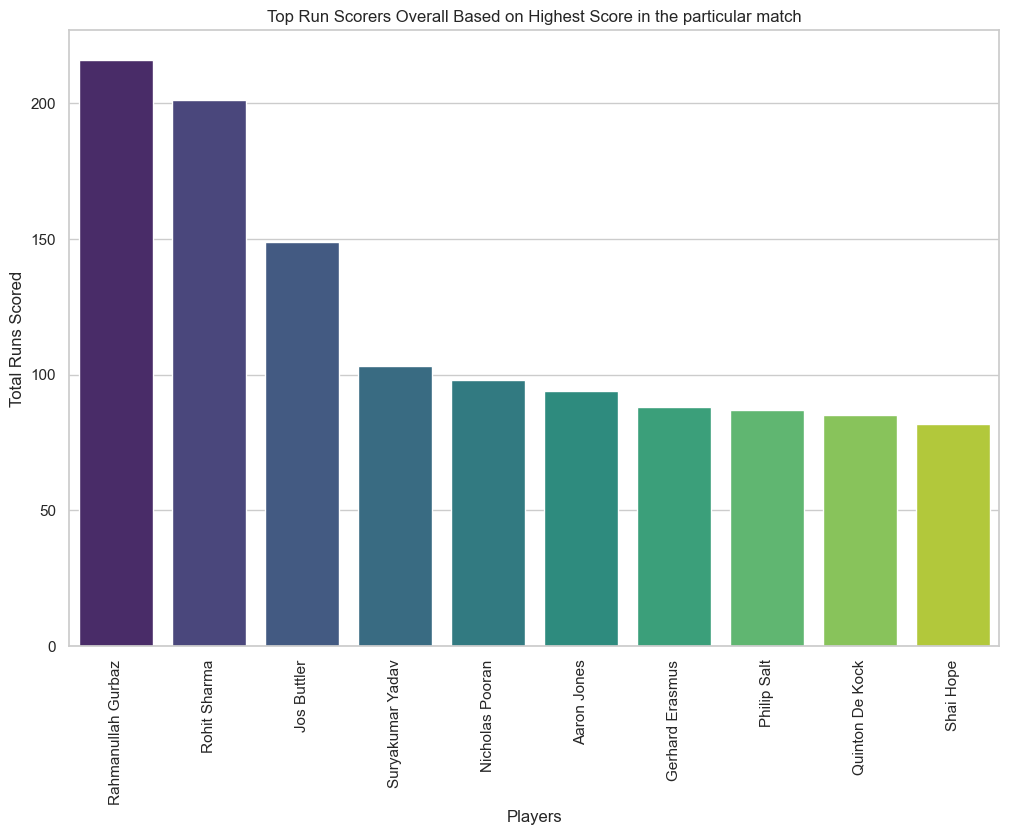

In [78]:
overall_top_scorers = df.groupby('Top Scorer').agg({'Highest Score': 'sum'}).sort_values(by='Highest Score', ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=overall_top_scorers.index, y=overall_top_scorers['Highest Score'], palette='viridis')
plt.title('Top Run Scorers Overall Based on Highest Score in the particular match')
plt.xlabel('Players')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=90)
plt.show()

##### Number of Times Best Bowler

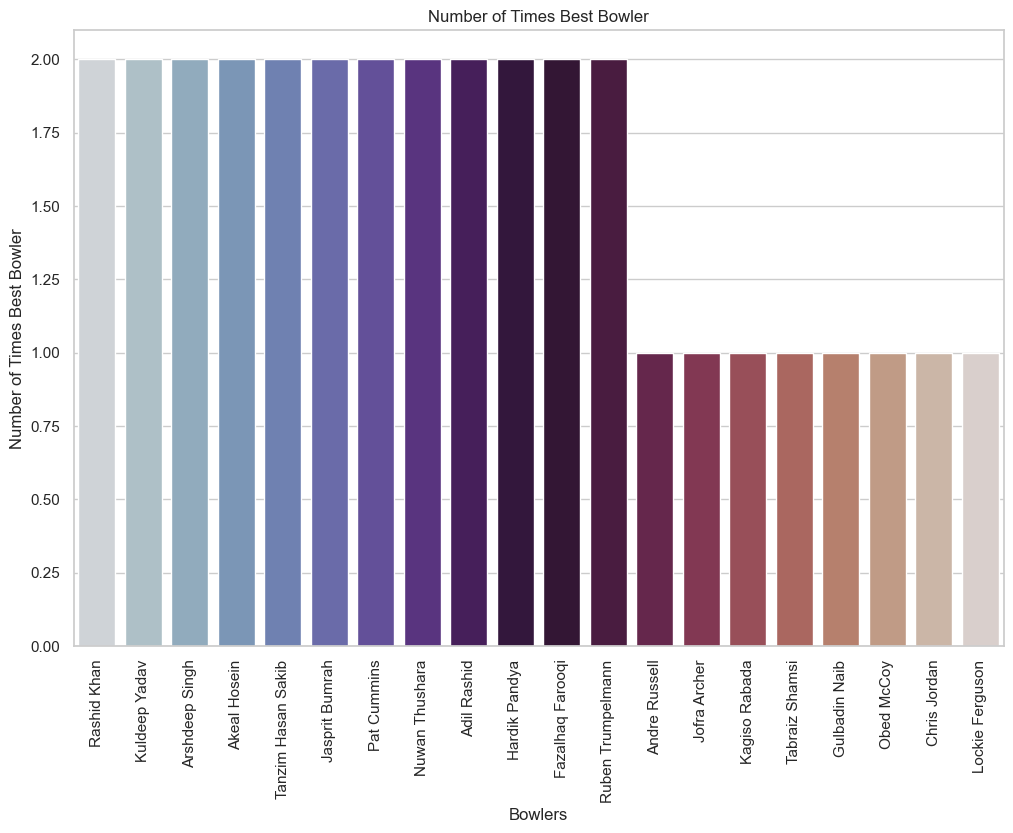

In [79]:
top_wicket_takers = df['Best Bowler'].value_counts().nlargest(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_wicket_takers.index, y=top_wicket_takers.values, palette='twilight')
plt.title('Number of Times Best Bowler')
plt.xlabel('Bowlers')
plt.ylabel('Number of Times Best Bowler')
plt.xticks(rotation=90)
plt.show()

##### Consistency of Top Scorers

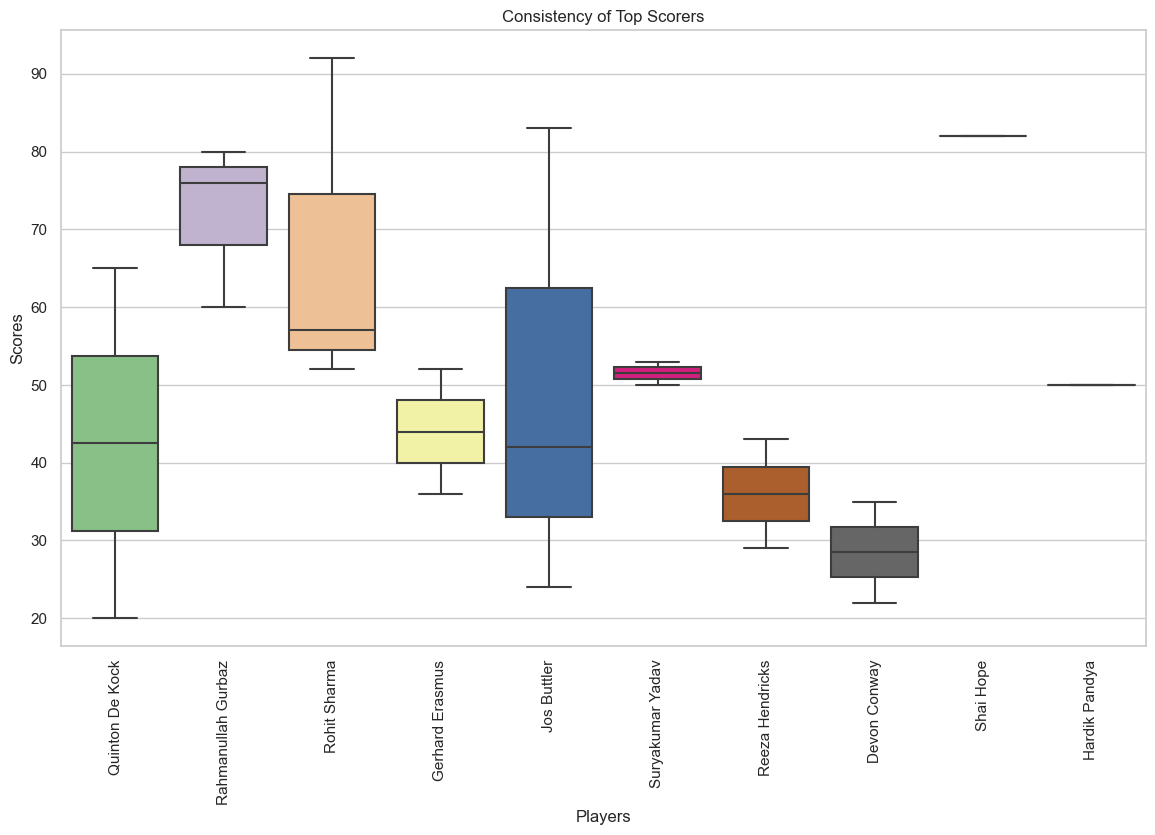

In [81]:
top_players = df['Top Scorer'].value_counts().nlargest(10).index
top_players_scores = df[df['Top Scorer'].isin(top_players)][['Top Scorer', 'Highest Score']]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Top Scorer', y='Highest Score', data=top_players_scores, palette='Accent')
plt.title('Consistency of Top Scorers')
plt.xlabel('Players')
plt.ylabel('Scores')
plt.xticks(rotation=90)
plt.show()

#### Match Outcome Trends

##### Winning Margins Distribution

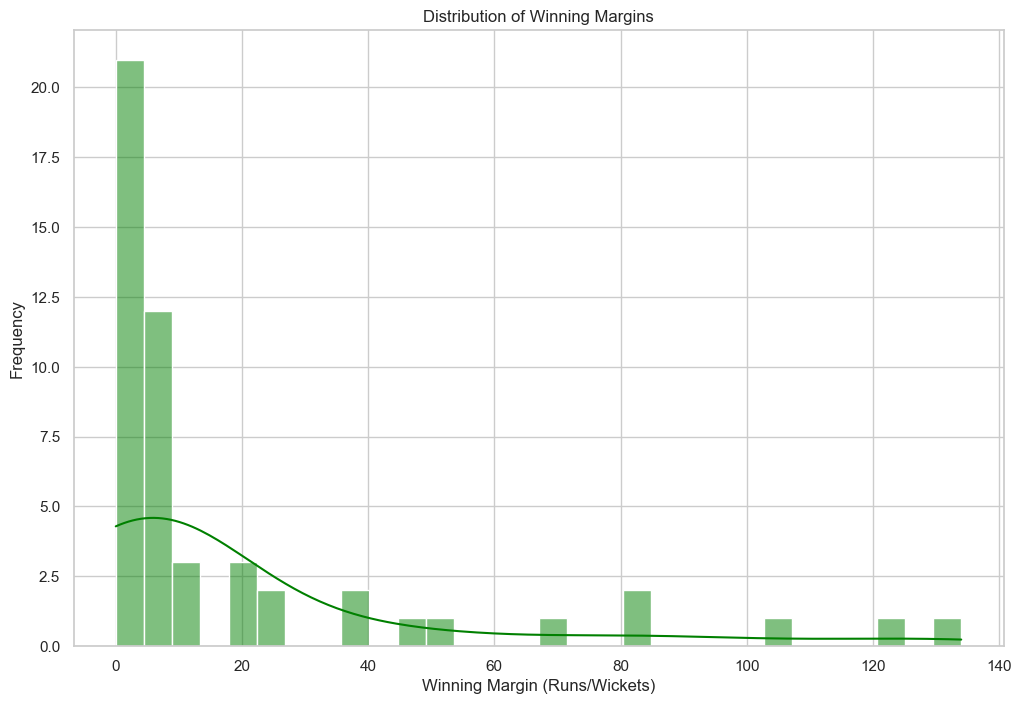

In [43]:
df['Winning Margin'] = np.where(df['WonBy'] == 'Runs', df['First Innings Score'] - df['Second Innings Score'], df['Second Innings Wickets'])
plt.figure(figsize=(12, 8))
sns.histplot(df['Winning Margin'], kde=True, bins=30, color='green')
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin (Runs/Wickets)')
plt.ylabel('Frequency')
plt.show()

##### Impact of Toss on Match Outcome

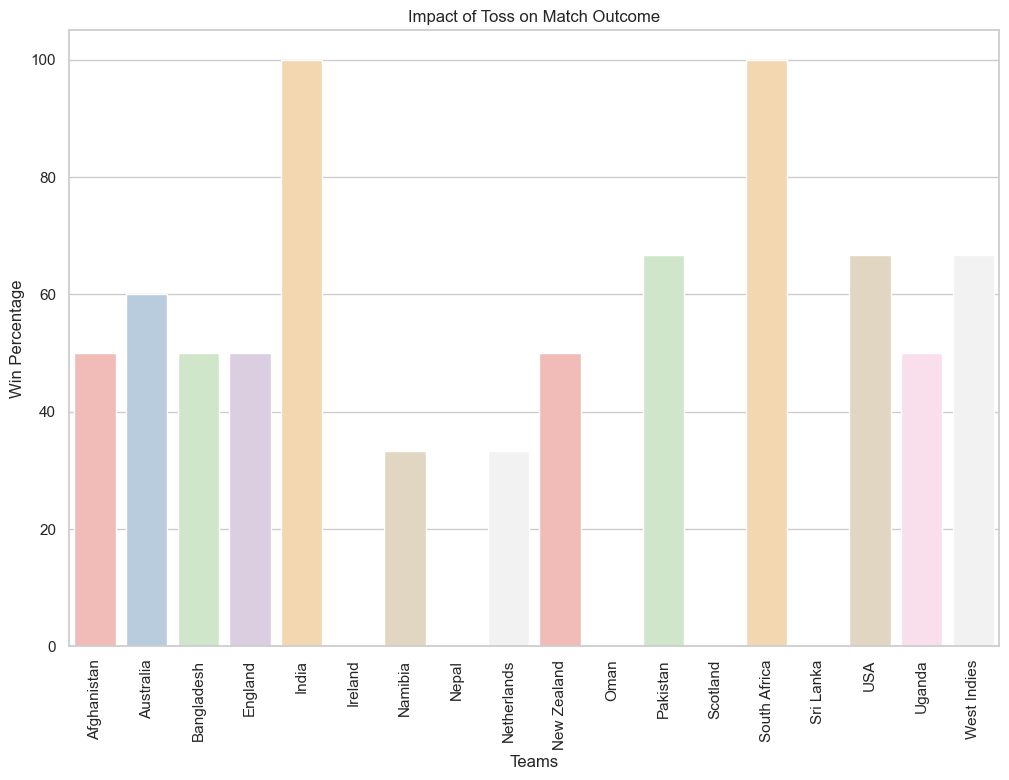

In [41]:
toss_impact = df.groupby('Toss Winner').apply(lambda x: (x['Winner'] == x['Toss Winner']).mean()).reset_index(name='Win Percentage')
plt.figure(figsize=(12, 8))
sns.barplot(x=toss_impact['Toss Winner'], y=toss_impact['Win Percentage'] * 100, palette='Pastel1')
plt.title('Impact of Toss on Match Outcome')
plt.xlabel('Teams')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.show()

#### Venue Analysis

##### High Scoring Venues

<Figure size 1400x800 with 0 Axes>

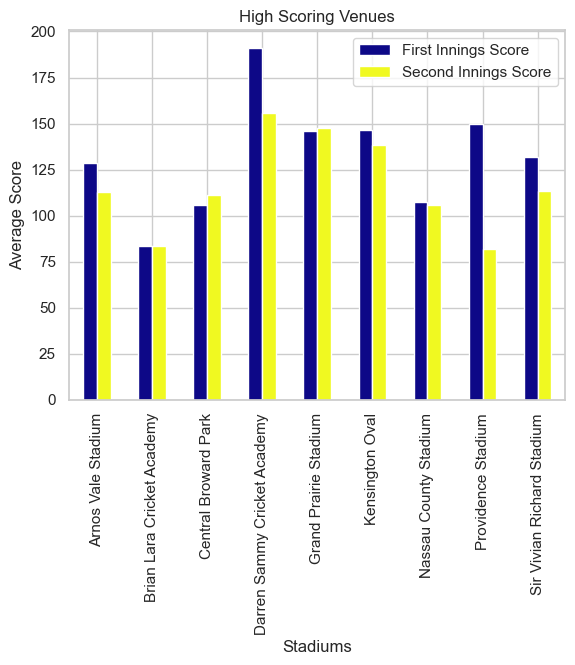

In [40]:
venue_scores = df.groupby('Stadium').agg({'First Innings Score': 'mean', 'Second Innings Score': 'mean'}).fillna(0)
plt.figure(figsize=(14, 8))
venue_scores.plot(kind='bar', colormap='plasma')
plt.title('High Scoring Venues')
plt.xlabel('Stadiums')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.show()

##### Venue-Specific Win Rates

<Figure size 1400x800 with 0 Axes>

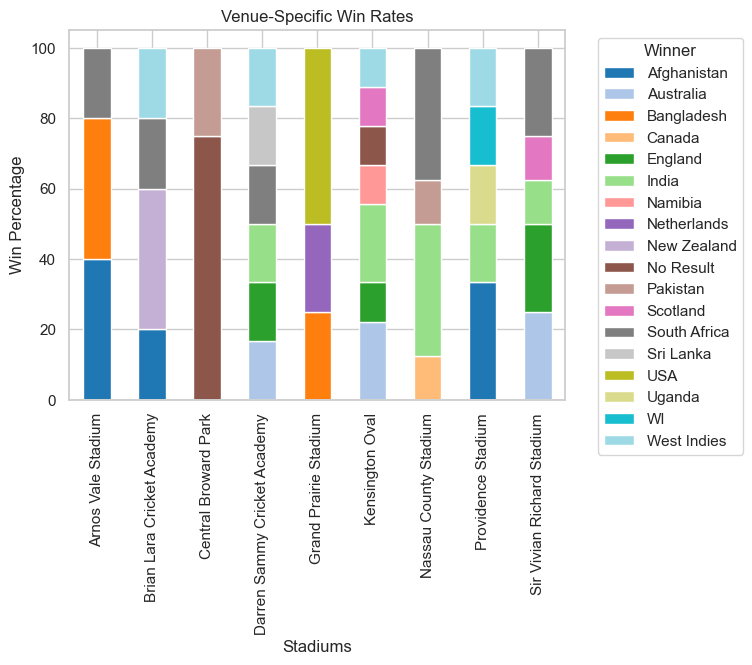

In [37]:
venue_wins = df.groupby('Stadium')['Winner'].value_counts(normalize=True).unstack().fillna(0) * 100
plt.figure(figsize=(14, 8))
ax = venue_wins.plot(kind='bar', stacked=True, colormap='tab20')

plt.title('Venue-Specific Win Rates')
plt.xlabel('Stadiums')
plt.ylabel('Win Percentage')
plt.xticks(rotation=90)
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

plt.show()
